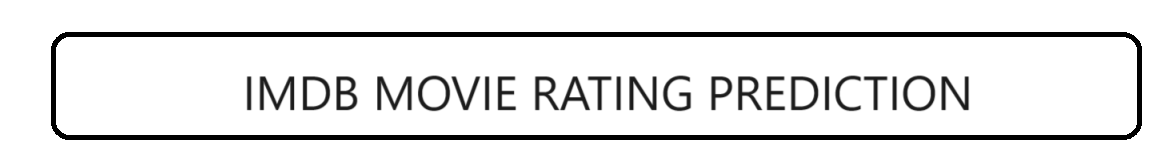

### Importing necessary libraries

In [3]:
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [4]:
imdb_df = pd.read_csv('IMDb Movies India.csv')

In [5]:
imdb_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## finding unique values

In [6]:
for col in imdb_df.columns:
    print("#"*75)
    print(" "*25,col)
    print("*"*75)
    print(imdb_df[col].unique())

###########################################################################
                          Name
***************************************************************************
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
###########################################################################
                          Year
***************************************************************************
[   nan -2019. -2021. -2010. -1997. -2005. -2008. -2012. -2014. -2004.
 -2016. -1991. -1990. -2018. -1987. -1948. -1958. -2017. -2020. -2009.
 -2002. -1993. -1946. -1994. -2007. -2013. -2003. -1998. -1979. -1951.
 -1956. -1974. -2015. -2006. -1981. -1985. -2011. -2001. -1967. -1988.
 -1995. -1959. -1996. -1970. -1976. -2000. -1999. -1973. -1968. -1943.
 -1953. -1986. -1983. -1989. -1982. -1977. -1957. -1950. -1992. -1969.
 -1975. -1947. -1972. -1971. -1935. -1978. -1960. -1944. -1963. -1940.
 -1984. -1934. -1955. -1936. -19

In [7]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


- There are too many null values

In [8]:
imdb_df.isnull().sum()/len(imdb_df)*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

- Columns like Duration,Rating,Votes have missing values more than 25%. We can remove those columns except Rating which is DV

In [9]:
imdb_df.drop(['Duration','Votes'],axis=1,inplace=True)

In [10]:
imdb_df

,Name,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,,NaN,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,Action,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,Action,NaN,NaN,NaN,NaN,NaN


In [11]:
for i in imdb_df.select_dtypes(include='object').columns:
    print(f"#"*30,{i},"##"*30)
    print(imdb_df[i].value_counts())

############################## {'Name'} ############################################################
Anjaam                7
Mamta                 7
Zindagi               6
Musafir               6
Albela                5
                     ..
Hamen Bhi Jeene Do    1
Hamen Khelne Do       1
Hameshaa              1
Hamid                 1
Zulm-O-Sitam          1
Name: Name, Length: 13838, dtype: int64
############################## {'Genre'} ############################################################
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64
############################## {'Director'} #########################

In [12]:
imdb_df['Name'].duplicated().value_counts()

False    13838
True      1671
Name: Name, dtype: int64

### Removing duplicate values

In [13]:
imdb_df.drop_duplicates(subset='Name',inplace=True) 

In [14]:
imdb_df['Name'].duplicated().value_counts()

False    13838
Name: Name, dtype: int64

### Handling object datatype columns

In [15]:
imdb_df.isnull().sum()/len(imdb_df)*100

Name         0.000000
Year         3.598786
Genre       11.490100
Rating      48.309004
Director     3.360312
Actor 1     10.398902
Actor 2     15.406851
Actor 3     20.270270
dtype: float64

### Finding outliers

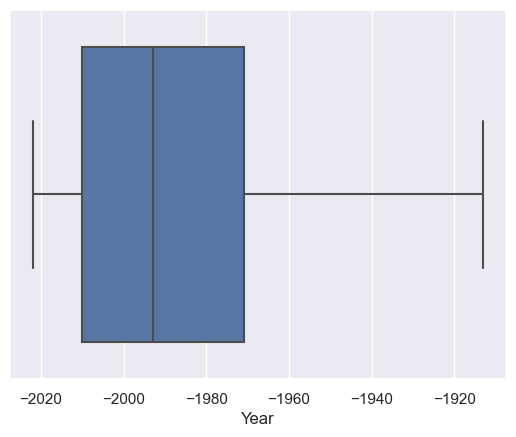

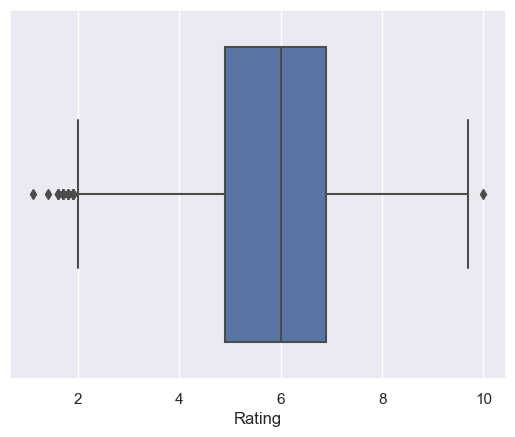

In [16]:
for i in imdb_df.select_dtypes(exclude=object).columns:
    sns.boxplot(imdb_df[i])
    plt.show()

In [17]:
imdb_df['Year']=imdb_df['Year'].fillna(imdb_df['Year'].median())

In [18]:
for i in imdb_df.select_dtypes(include=object).columns:
    imdb_df[i]=imdb_df[i].fillna(imdb_df[i].mode().iloc[0])

In [19]:
name_rating = imdb_df.groupby('Name')['Rating'].transform('mean')
imdb_df['Name_mean_rating'] = name_rating

In [20]:
actor1_rating=imdb_df.groupby('Actor 1')['Rating'].transform('mean')
imdb_df['Actor_1_rating']=actor1_rating

In [21]:
actor2_rating=imdb_df.groupby('Actor 2')['Rating'].transform('mean')
imdb_df['Actor_2_rating']=actor2_rating

In [22]:
actor3_rating=imdb_df.groupby('Actor 3')['Rating'].transform('mean')
imdb_df['Actor_3_rating']=actor3_rating

In [23]:
director_rating=imdb_df.groupby('Director')['Rating'].transform('mean')
imdb_df['director_rating']=director_rating

In [24]:
genre_rating=imdb_df.groupby('Genre')['Rating'].transform('mean')
imdb_df['genre_rating']=genre_rating

In [25]:
imdb_df.drop(['Name','Actor 1','Actor 2','Actor 3','Genre','Director'],axis=1,inplace=True)

In [26]:
imdb_df

,Year,Rating,Name_mean_rating,Actor_1_rating,Actor_2_rating,Actor_3_rating,director_rating,genre_rating
0,-1993.0,NaN,NaN,NaN,5.187500,NaN,5.70000,6.348960
1,-2019.0,7.0,7.0,6.850000,7.000000,7.000000,7.00000,6.348960
2,-2021.0,NaN,NaN,7.000000,7.350000,NaN,NaN,6.442857
3,-2019.0,4.4,4.4,5.420000,4.400000,4.450000,4.40000,5.707895
4,-2010.0,NaN,NaN,7.000000,5.742857,5.400000,6.30000,6.348960
...,...,...,...,...,...,...,...,...
15504,-1988.0,4.6,4.6,6.079070,3.700000,4.600000,4.07500,5.130084
15505,-1999.0,4.5,4.5,5.485333,4.771429,5.500000,5.25000,5.462241
15506,-2005.0,NaN,NaN,NaN,6.434510,6.529738,NaN,5.130084
15507,-1988.0,NaN,NaN,6.665138,6.434510,6.529738,6.81250,5.130084


In [27]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13838 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              13838 non-null  float64
 1   Rating            7153 non-null   float64
 2   Name_mean_rating  7153 non-null   float64
 3   Actor_1_rating    10999 non-null  float64
 4   Actor_2_rating    11373 non-null  float64
 5   Actor_3_rating    11780 non-null  float64
 6   director_rating   10192 non-null  float64
 7   genre_rating      13773 non-null  float64
dtypes: float64(8)
memory usage: 973.0 KB


In [28]:
imdb_df['Name_mean_rating']=imdb_df['Name_mean_rating'].fillna(imdb_df['Name_mean_rating'].median())
imdb_df['Actor_1_rating']=imdb_df['Actor_1_rating'].fillna(imdb_df['Actor_1_rating'].median())
imdb_df['Actor_2_rating']=imdb_df['Actor_2_rating'].fillna(imdb_df['Actor_2_rating'].median())
imdb_df['Actor_3_rating']=imdb_df['Actor_3_rating'].fillna(imdb_df['Actor_3_rating'].median())
imdb_df['director_rating']=imdb_df['director_rating'].fillna(imdb_df['director_rating'].median())
imdb_df['genre_rating']=imdb_df['genre_rating'].fillna(imdb_df['genre_rating'].median())
imdb_df['Rating']=imdb_df['Rating'].fillna(imdb_df['Rating'].median())

In [29]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13838 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              13838 non-null  float64
 1   Rating            13838 non-null  float64
 2   Name_mean_rating  13838 non-null  float64
 3   Actor_1_rating    13838 non-null  float64
 4   Actor_2_rating    13838 non-null  float64
 5   Actor_3_rating    13838 non-null  float64
 6   director_rating   13838 non-null  float64
 7   genre_rating      13838 non-null  float64
dtypes: float64(8)
memory usage: 973.0 KB


- Handled all the null values, all the columns are are numeric datatypes Encoding Not required

### splitting data into dv and idv

In [30]:
x=imdb_df.drop('Rating',axis=1)
y=imdb_df[['Rating']]

In [31]:
x

,Year,Name_mean_rating,Actor_1_rating,Actor_2_rating,Actor_3_rating,director_rating,genre_rating
0,-1993.0,6.0,6.100000,5.187500,6.266667,5.70000,6.348960
1,-2019.0,7.0,6.850000,7.000000,7.000000,7.00000,6.348960
2,-2021.0,6.0,7.000000,7.350000,6.266667,6.00000,6.442857
3,-2019.0,4.4,5.420000,4.400000,4.450000,4.40000,5.707895
4,-2010.0,6.0,7.000000,5.742857,5.400000,6.30000,6.348960
...,...,...,...,...,...,...,...
15504,-1988.0,4.6,6.079070,3.700000,4.600000,4.07500,5.130084
15505,-1999.0,4.5,5.485333,4.771429,5.500000,5.25000,5.462241
15506,-2005.0,6.0,6.100000,6.434510,6.529738,6.00000,5.130084
15507,-1988.0,6.0,6.665138,6.434510,6.529738,6.81250,5.130084


In [32]:
y

,Rating
0,6.0
1,7.0
2,6.0
3,4.4
4,6.0
...,...
15504,4.6
15505,4.5
15506,6.0
15507,6.0


### Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

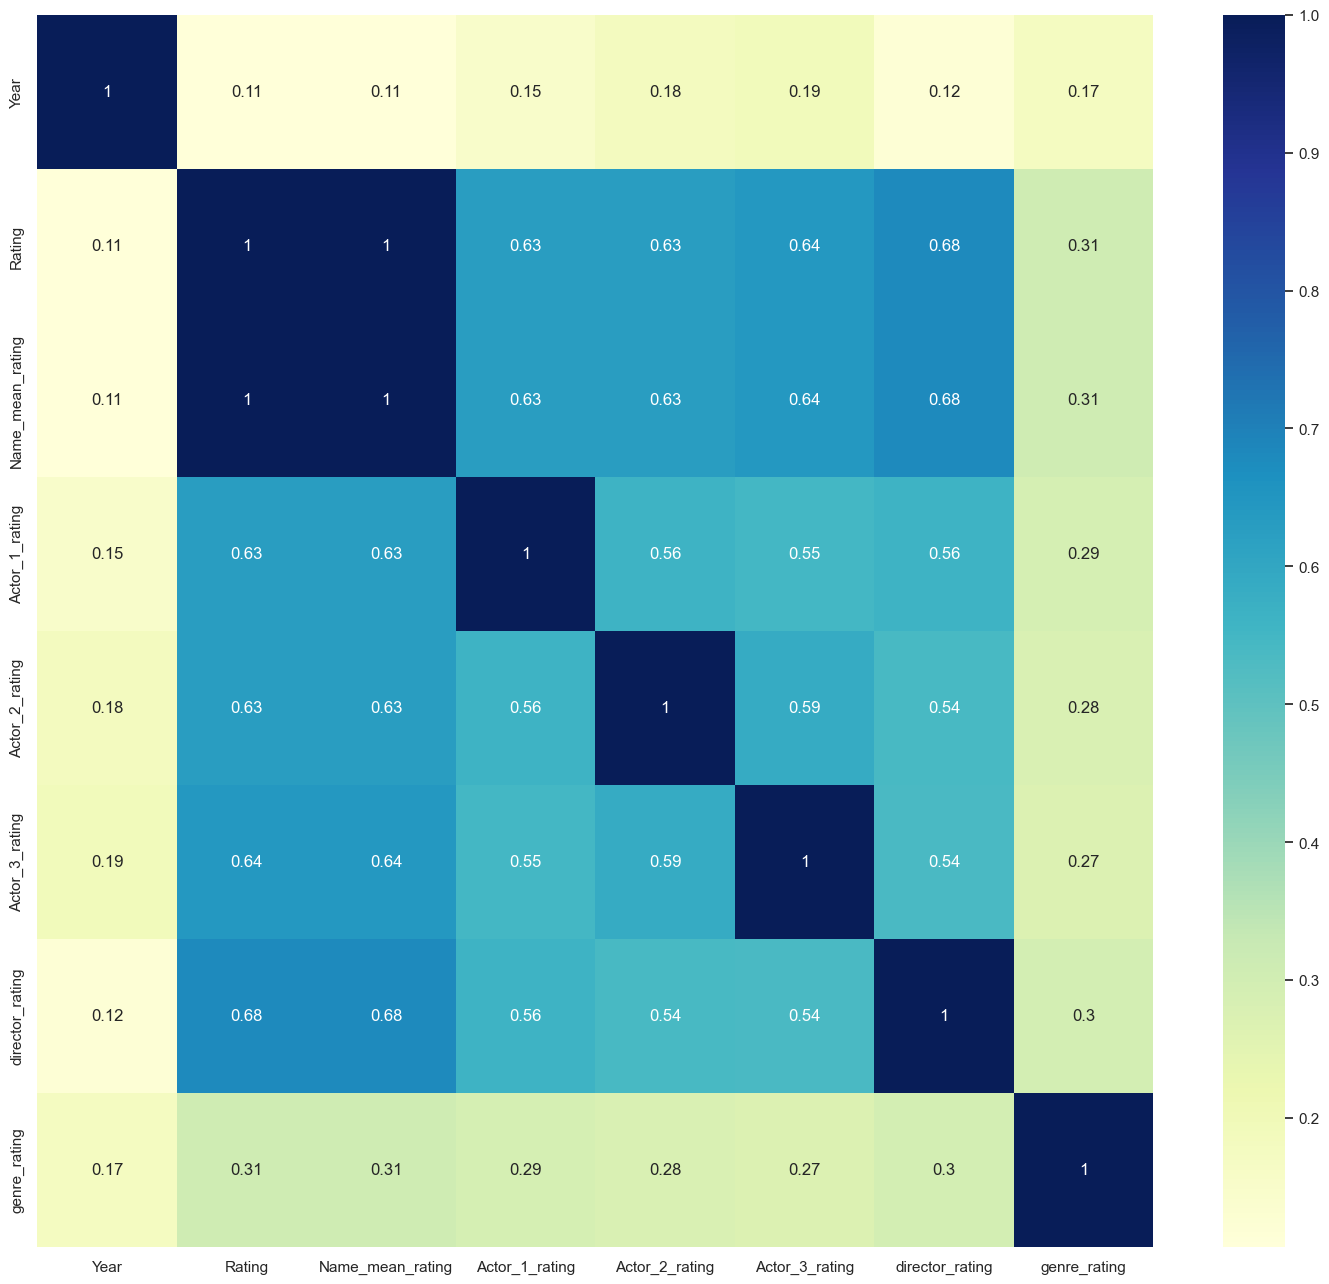

In [34]:
plt.figure(figsize=(18,16))
corr = imdb_df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

- No multicollinearity b/w independented variables

### Splitting data into train and test

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc,y,test_size=0.25,random_state=10)

## Model Building

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [37]:
#linear
linear=LinearRegression()

In [38]:
#DecisionTree
dtree=DecisionTreeRegressor()

In [39]:
#Bagging
bagg=BaggingRegressor()

In [40]:
#Randomforest
rf=RandomForestRegressor()

In [41]:
#Boosting
gb=GradientBoostingRegressor()
xgb=XGBRegressor()

In [42]:
#K nearest neighbor
knn=KNeighborsRegressor()

In [43]:
#SVM
svm=SVR()

In [44]:
list1=[(linear,'linear',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gb,'GradientBoost',5),(xgb,'XGBoost',6),(knn,'KNN',7),(svm,'SVM',8)]

In [45]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('#'*75)
    print(f'Cross validation of {model_name}')
    Train_cvs=cross_val_score(model,x_train,y_train,cv=10).mean()
    Test_cvs=cross_val_score(model,x_test,y_test,cv=10).mean()
    variance=abs(Train_cvs-Test_cvs)
    print('Train accuracy:',Train_cvs)
    print('Test accuracy:',Test_cvs)
    print('variance:',variance)
    if variance>0.1 :
        print(f'Overfitting {model_name}')

###########################################################################
Cross validation of linear
Train accuracy: 1.0
Test accuracy: 1.0
variance: 0.0
###########################################################################
Cross validation of decisiontree
Train accuracy: 0.9998819160322638
Test accuracy: 0.9998794602807978
variance: 2.4557514660683566e-06
###########################################################################
Cross validation of bagging
Train accuracy: 0.9999139554991159
Test accuracy: 0.999827101769195
variance: 8.685372992089935e-05
###########################################################################
Cross validation of randomforest
Train accuracy: 0.9999134897568694
Test accuracy: 0.9998242012181977
variance: 8.928853867173903e-05
###########################################################################
Cross validation of GradientBoost
Train accuracy: 0.9999372880128193
Test accuracy: 0.9999401219812887
variance: 2.8339684693401423e-06
#######

In [46]:
from sklearn.metrics import r2_score

In [47]:
accuracy_list=[]
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=r2_score(y_test,y_pred_test)
    accuracy_list.append(test_acc)

In [48]:
model=['linear','decisiontree','bagging','randomforest','GradientBoost','XGBoost','KNN','SVM']

In [49]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':accuracy_list})

In [50]:
metrics_df

,model_name,Accuracy
0,linear,1.000000
1,decisiontree,0.999988
2,bagging,0.999985
3,randomforest,0.999989
4,GradientBoost,0.999996
5,XGBoost,0.999994
6,KNN,0.975471
7,SVM,0.985791


## Summary

### We can observe that all models predicted and gave best accuracy
### We can conclude all are Best models